In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist

In [3]:
(X_train, y_train),(X_test, y_test)= mnist.load_data()

In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_test.shape

(10000, 28, 28)

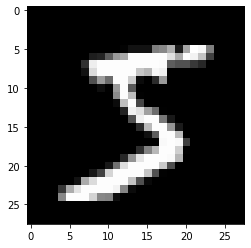

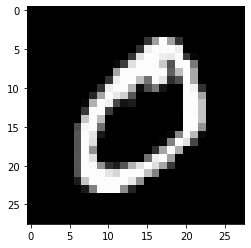

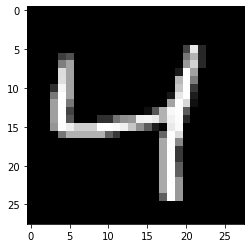

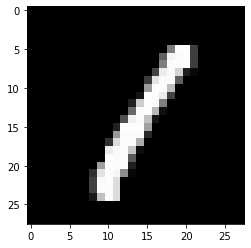

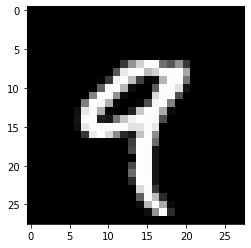

In [8]:
for i in range(5):
    plt.imshow(X_train[i],cmap='gray')
    plt.show()


In [9]:
class_names=[0,1,2,3,4,5,6,7,8,9]

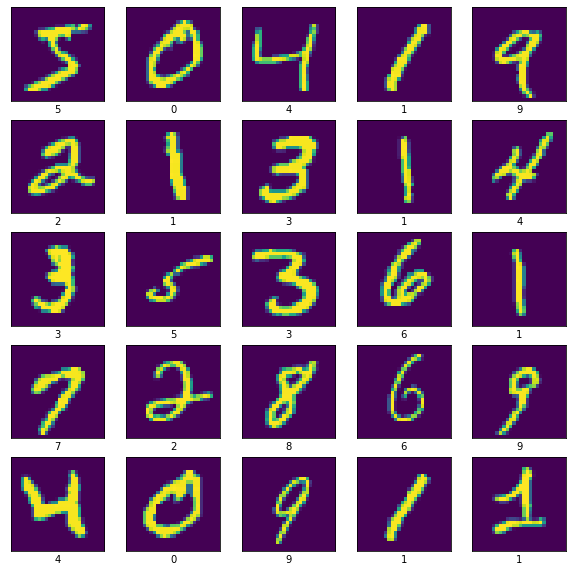

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [11]:
y_test.shape

(10000,)

In [12]:
#from tensorflow.python.keras.utils import np_utils

In [13]:
#y_train = keras.utils.to_categorical(y_train, 10)
#y_test = keras.utils.to_categorical(y_test, 10)

In [14]:
y_train.shape

(60000,)

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)

In [18]:
X_train.shape[0]

60000

In [19]:
X_train.shape

(60000, 28, 28, 1)

In [20]:
def build_model():
    model = Sequential()
    model.add(Conv2D(15, (5,5), input_shape = (28, 28,1), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(units = 500, activation ='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units = 100, activation ='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units = 10, activation ='softmax'))
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])
    return model
    

In [21]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 15)        390       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 15)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 30)        4080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 750)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               375500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [22]:
m = model.fit(X_train, y_train, validation_split = 0.05, epochs = 10,
             batch_size = 5, shuffle = 1)

Epoch 1/10
11400/11400 [==============================] - 74s 7ms/step - loss: 0.1803 - accuracy: 0.9478 - val_loss: 0.0447 - val_accuracy: 0.9883
Epoch 2/10
11400/11400 [==============================] - 70s 6ms/step - loss: 0.0909 - accuracy: 0.9770 - val_loss: 0.0538 - val_accuracy: 0.9873
Epoch 3/10
11400/11400 [==============================] - 53s 5ms/step - loss: 0.0790 - accuracy: 0.9804 - val_loss: 0.0441 - val_accuracy: 0.9903
Epoch 4/10
11400/11400 [==============================] - 54s 5ms/step - loss: 0.0752 - accuracy: 0.9819 - val_loss: 0.0510 - val_accuracy: 0.9880
Epoch 5/10
11400/11400 [==============================] - 54s 5ms/step - loss: 0.0755 - accuracy: 0.9819 - val_loss: 0.0485 - val_accuracy: 0.9887
Epoch 6/10
11400/11400 [==============================] - 54s 5ms/step - loss: 0.0716 - accuracy: 0.9831 - val_loss: 0.0666 - val_accuracy: 0.9887
Epoch 7/10
11400/11400 [==============================] - 57s 5ms/step - loss: 0.0715 - accuracy: 0.9830 - val_loss: 0

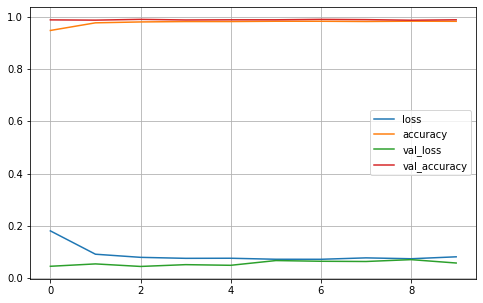

In [23]:
import pandas as pd
pd.DataFrame(m.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

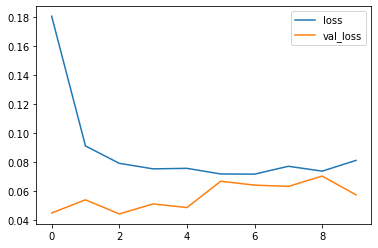

In [24]:
plt.plot(m.history['loss'], label = 'loss')
plt.plot(m.history['val_loss'], label = 'val_loss')
plt.legend()

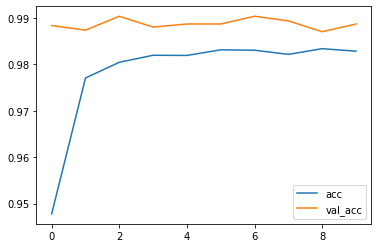

In [25]:
plt.plot(m.history['accuracy'], label = 'acc')
plt.plot(m.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [26]:
score = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0643 - accuracy: 0.9848


In [27]:
score

[0.06427620351314545, 0.9847999811172485]

In [28]:
model.save('final_model.h5')

In [29]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [30]:
y_pred = model.predict_classes(X_new)
y_pred


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [31]:
import numpy as np
np.array(class_names)[y_pred]   # updated 

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [32]:
X_test = X_test.reshape(X_test.shape[0], 28,28)

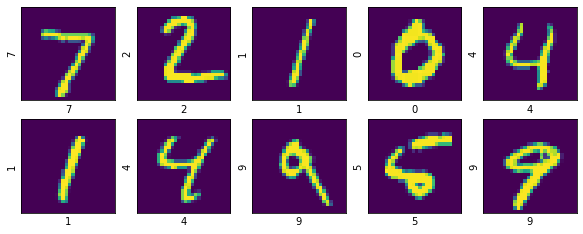

In [33]:
# Predicted data
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(X_test[i])
    plt.xlabel(class_names[y_pred[i]])
    plt.ylabel(class_names[y_test[i]])
plt.show()

In [43]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
# load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
# convert to array
    img = img_to_array(img)
# reshape into a single sample with 1 channel
    img = img.reshape(1,28, 28, 1)
# prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

# load an image and predict the class
def run_example():
# load the image
    img = load_image('image1.png')
# load model
    model = load_model('final_model.h5')
# predict the class
    digit = model.predict_classes(img)
    print(digit[0])

# entry point, run the example
run_example()

0
